<a href="https://colab.research.google.com/github/Mateo101125/methixanthin_content_in_ilex_guayusa_-python/blob/main/Anova_theophylline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#connect Drive with colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from scipy import stats as sts
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np
!pip install pingouin
import pingouin as pg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 4.4 MB/s eta 0:00:00


In [ ]:
path = "/content/drive/MyDrive/script_Guayusa/data_q.xlsx"
data_hplc = pd.read_excel(path)
data_hplc

,Chakra,light_condition,age_period,Caffeine,Theobromine,Theophylline
0,A,+,T0,24.866384,0.157598,NaN
1,A,+,T0,26.079888,0.167050,NaN
2,A,+,T0,26.606184,0.175299,NaN
3,A,-,T0,29.011980,0.030485,NaN
4,A,-,T0,28.736393,0.029729,NaN
5,A,-,T0,28.242765,0.026408,NaN
6,A,+,T1,22.564354,0.191126,NaN
7,A,+,T1,22.729765,0.176848,NaN
8,A,+,T1,23.869761,0.193597,NaN
9,A,-,T1,25.440661,0.061057,0.077486


There are insufficient data for site comparisons, we attempted to compare data from the only location where theophylline was quantified in all conditions.

In [ ]:
df= pd.DataFrame()
df= data_hplc.iloc[0]
df= data_hplc.iloc[18:35]
df

,Chakra,light_condition,age_period,Caffeine,Theobromine,Theophylline
18,B,+,T0,31.736813,0.414675,1.132912
19,B,+,T0,37.223784,0.488737,2.450942
20,B,+,T0,34.426447,0.453168,2.057815
21,B,-,T0,35.326336,0.460787,2.038812
22,B,-,T0,32.373013,0.524667,1.203371
23,B,-,T0,32.814748,0.520536,1.691361
24,B,+,T1,27.225754,0.459168,1.608320
25,B,+,T1,23.658947,0.395461,1.708030
26,B,+,T1,23.407238,0.311788,1.003838
27,B,-,T1,37.626370,0.651947,1.677131


In [ ]:
formula = 'Theophylline ~light_condition * age_period'

model = sm.formula.ols(formula, data= df).fit()
aov_table =  sm.stats.anova_lm(model,typ=1)

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Theophylline   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                 -0.108
Method:                 Least Squares   F-statistic:                    0.6872
Date:                Fri, 26 Apr 2024   Prob (F-statistic):              0.643
Time:                        11:26:35   Log-Likelihood:                -7.8708
No. Observations:                  17   AIC:                             27.74
Df Residuals:                      11   BIC:                             32.74
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


r-squared too low, model does not work

#Normality Tests

##Shapiro–Wilk test

In [ ]:
w, p= sts.shapiro(model.resid)
print('w=%.3f, p_value=%.3f' % (w, p))

w=0.924, p_value=0.172


#Levene test for homogeneity of variance

In [ ]:
df['interaction'] = df['age_period']+df['light_condition']+df['Chakra']

pg.homoscedasticity(data=df,
                    dv='Theophylline',
                    group='interaction').round(5)

<ipython-input-10-bbcb0a86dfb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['interaction'] = df['age_period']+df['light_condition']+df['Chakra']


,W,pval,equal_var
levene,0.33026,0.88433,True


#Assumption of independence:

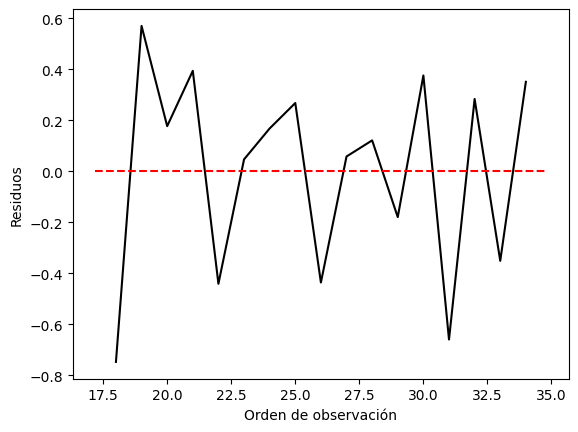

In [ ]:
def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', color='red')
residual= model.resid
#abline(h=0,col="red")
plt.plot(residual, color='black')
plt.xlabel('Orden de observación')
plt.ylabel('Residuos')
abline(0, 0)
plt.show()

In [ ]:
from statsmodels.stats.stattools import durbin_watson as dwtest

import numpy as np

dwtest(resids=np.array(model.resid))

2.747221835543027

#Anova

In [ ]:
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
light_condition,1.0,0.111044,0.111044,0.486146,0.500122
age_period,2.0,0.194777,0.097388,0.426360,0.663224
light_condition:age_period,2.0,0.479031,0.239515,1.048584,0.382987
Residual,11.0,2.512596,0.228418,NaN,NaN


no significant differences

In [ ]:
pip freeze

absl-py==1.4.0
aiohttp==3.8.6
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.3.1
altair==4.2.2
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.5.0
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.0
attrs==23.1.0
audioread==3.0.1
autograd==1.6.2
Babel==2.13.1
backcall==0.2.0
beautifulsoup4==4.11.2
bidict==0.22.1
bigframes==0.13.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.1
bqplot==0.12.42
branca==0.7.0
build==1.0.3
CacheControl==0.13.1
cachetools==5.3.2
catalogue==2.0.10
certifi==2023.7.22
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.7
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.27.7
cmdstanpy==1.2.0
colorcet==3.0.1
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.3
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.0
cryptography==41.0.5
cufflinks==0.17.3
cupy-cuda11x==11.0.0
cvxopt==1.3.2
cvxpy==1.3.2
cycler==0.12.1
cy